In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [25]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(imagem):
    identificacoes = []
    
    hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)
    
    vermelho_inf1 = np.array([0, 50, 50])
    vermelho_sup1 = np.array([10, 255, 255])
    vermelho_inf2 = np.array([160, 50, 50])
    vermelho_sup2 = np.array([180, 255, 255])
    
    branco_inf = np.array([0, 0, 180])
    branco_sup = np.array([180, 40, 255])
    
    verde_inf = np.array([35, 40, 40])
    verde_sup = np.array([90, 255, 255])
    
    laranja_inf = np.array([8, 100, 100])
    laranja_sup = np.array([25, 255, 255])
    
    kernel = np.ones((5,5), np.uint8)
    
    mascara_vermelho = cv2.bitwise_or(
        cv2.inRange(hsv, vermelho_inf1, vermelho_sup1),
        cv2.inRange(hsv, vermelho_inf2, vermelho_sup2)
    )
    mascara_vermelho = cv2.morphologyEx(mascara_vermelho, cv2.MORPH_CLOSE, kernel)
    
    mascara_branco = cv2.inRange(hsv, branco_inf, branco_sup)
    mascara_branco = cv2.morphologyEx(mascara_branco, cv2.MORPH_CLOSE, kernel)
    
    mascara_verde = cv2.inRange(hsv, verde_inf, verde_sup)
    mascara_verde = cv2.morphologyEx(mascara_verde, cv2.MORPH_CLOSE, kernel)
    
    mascara_laranja = cv2.inRange(hsv, laranja_inf, laranja_sup)
    mascara_laranja = cv2.morphologyEx(mascara_laranja, cv2.MORPH_CLOSE, kernel)
    
    mascara_final = cv2.bitwise_or(
        cv2.bitwise_or(mascara_vermelho, mascara_branco),
        cv2.bitwise_or(mascara_verde, mascara_laranja)
    )
    
    mascara_final = cv2.morphologyEx(mascara_final, cv2.MORPH_CLOSE, kernel)
    mascara_final = cv2.morphologyEx(mascara_final, cv2.MORPH_OPEN, kernel)
    
    contornos, _ = cv2.findContours(mascara_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contorno in contornos:
        x, y, largura, altura = cv2.boundingRect(contorno)
        
        if largura < 30 or altura < 20 or largura/altura < 0.5 or largura/altura > 2.0:
            continue
        
        regiao_bandeira = imagem[y:y+altura, x:x+largura]
        hsv_bandeira = hsv[y:y+altura, x:x+largura]
        
        mascara_vermelho_bandeira = cv2.bitwise_or(
            cv2.inRange(hsv_bandeira, vermelho_inf1, vermelho_sup1),
            cv2.inRange(hsv_bandeira, vermelho_inf2, vermelho_sup2)
        )
        mascara_branco_bandeira = cv2.inRange(hsv_bandeira, branco_inf, branco_sup)
        mascara_verde_bandeira = cv2.inRange(hsv_bandeira, verde_inf, verde_sup)
        mascara_laranja_bandeira = cv2.inRange(hsv_bandeira, laranja_inf, laranja_sup)
        
        total_pix = largura * altura
        perc_vermelho = cv2.countNonZero(mascara_vermelho_bandeira) / total_pix
        perc_branco = cv2.countNonZero(mascara_branco_bandeira) / total_pix
        perc_verde = cv2.countNonZero(mascara_verde_bandeira) / total_pix
        perc_laranja = cv2.countNonZero(mascara_laranja_bandeira) / total_pix

        if perc_verde > 0.3 and perc_branco > 0.3 and perc_vermelho > 0.3 and perc_laranja == 0:
            identificacoes.append(("Italia", (x, y), (x + largura, y + altura)))
            continue
        
        if perc_verde > 0.3 and perc_branco > 0.3 and perc_laranja > 0.3 and perc_vermelho == 0:
            identificacoes.append(("Irlanda", (x, y), (x + largura, y + altura)))
            continue
        
        if perc_branco > 0.5 and 0.4 < perc_vermelho < 0.5 and perc_verde <= 0 and perc_laranja <= 0:
            identificacoes.append(("Singapura", (x, y), (x + largura, y + altura)))
            continue
        
        if perc_vermelho > 0.6 and 0.2 < perc_branco < 0.4 and perc_laranja <= 0 and perc_verde <= 0:
            identificacoes.append(("Peru", (x, y), (x + largura, y + altura)))
            continue
        
        if perc_vermelho == 0.5 and perc_branco == 0.5:
            identificacoes.append(("Monaco", (x, y), (x + largura, y + altura)))
            continue
    
    return identificacoes



In [26]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('Irlanda', (705, 589), (971, 723)), ('Italia', (343, 298), (608, 475))]


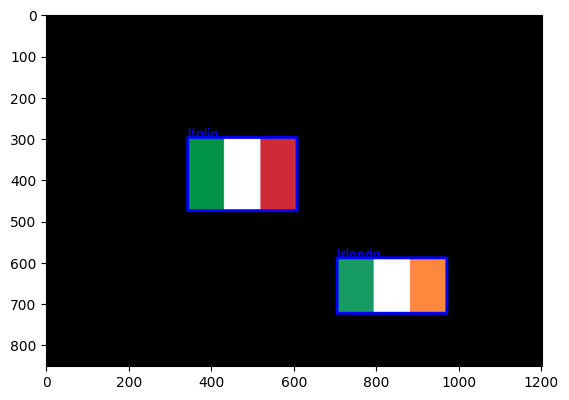

In [27]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
# img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


